# OHP Atmospheric Profile

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : April 28th 2017
- update :



This notebook provide the atmospheric profile for OHP taken from LibRandTran version 2.0.1 for **afglus** atmosphere

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import re
import pandas as pd

In [3]:
from astropy.constants import N_A

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [18]:
#atmprofile_ascii_file='libradtran_data/UVSPEC_OHP_atmprof_verbose cut.txt'
atmprofile_ascii_file='libradtran_data/prof_afglus_cut.txt'
atmprofile_ascii_file2='libradtran_data/prof_afglmw_cut.txt'
atmprofile_ascii_file3='libradtran_data/prof_afglms_cut.txt'

lc |  z[km]  |  Pressure  | Temp.  |    Air      |   Ozone     |     O2      | Water vap.  |    CO2      |    NO2      |      O4      |
     |         |   [hPa]    |  [K]   |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    | [1.0e+46cm-6]|

In [19]:
data_table=np.loadtxt(atmprofile_ascii_file,skiprows=4)
data_table2=np.loadtxt(atmprofile_ascii_file2,skiprows=4)
data_table3=np.loadtxt(atmprofile_ascii_file3,skiprows=4)

In [20]:
NbLayers=data_table.shape[0]
GroundData_OHP=data_table[NbLayers-1,:]

In [8]:
num=data_table[:,0]
z=data_table[:,1]
Pressure=data_table[:,2]     # hPa
Temperature=data_table[:,3]  # K 
AirDensity=data_table[:,4]   # cm-3
O3Density=data_table[:,5]    # cm-3
O2Density=data_table[:,6]    # cm-3
PWVDensity=data_table[:,7]      # cm-3
CO2Density=data_table[:,8]   # cm-3
NO2Density=data_table[:,9]   # cm-3
O4Density=data_table[:,10]   # cm-3

In [22]:
num3=data_table3[:,0]
z3=data_table3[:,1]
Pressure3=data_table3[:,2]     # hPa
Temperature3=data_table3[:,3]  # K 
AirDensity3=data_table3[:,4]   # cm-3
O3Density3=data_table3[:,5]    # cm-3
O2Density3=data_table3[:,6]    # cm-3
PWVDensity3=data_table3[:,7]      # cm-3
CO2Density3=data_table3[:,8]   # cm-3
NO2Density3=data_table3[:,9]   # cm-3
O4Density3=data_table3[:,10]   # cm-3

In [ ]:
num2=data_table2[:,0]
z2=data_table2[:,1]
Pressure2=data_table2[:,2]     # hPa
Temperature2=data_table2[:,3]  # K 
AirDensity2=data_table2[:,4]   # cm-3
O3Density2=data_table2[:,5]    # cm-3
O2Density2=data_table2[:,6]    # cm-3
PWVDensity2=data_table2[:,7]      # cm-3
CO2Density2=data_table2[:,8]   # cm-3
NO2Density2=data_table2[:,9]   # cm-3
O4Density2=data_table2[:,10]   # cm-3

In [9]:
Pressure_Ground=GroundData_OHP[2]     # hPa
Temperature_Ground=GroundData_OHP[3]  # K 
AirDensity_Ground=GroundData_OHP[4]   # cm-3
O3Density_Ground=GroundData_OHP[5]    # cm-3
O2Density_Ground=GroundData_OHP[6]    # cm-3
PWVDensity_Ground=GroundData_OHP[7]      # cm-3
CO2Density_Ground=GroundData_OHP[8]   # cm-3
NO2Density_Ground=GroundData_OHP[9]   # cm-3
O4Density_Ground=GroundData_OHP[10]   # cm-3

In [10]:
print 'Pressure_Ground = ', Pressure_Ground,'hPa'
print 'Temperature_Ground = ', Temperature_Ground,'°K'
print 'Pressure_Ground = ', Pressure_Ground,'hPa'
print 'Air_Density_Ground = ', AirDensity_Ground,' cm-3'
print 'O3_Density_Ground = ', O3Density_Ground,' cm-3'
print 'O2_Density_Ground = ', O2Density_Ground,' cm-3'
print 'PWV_Density_Ground = ', PWVDensity_Ground,' cm-3'
print 'CO2_Density_Ground = ', CO2Density_Ground,' cm-3'
print 'NO2_Density_Ground = ', NO2Density_Ground,' cm-3'

Pressure_Ground =  937.22595 hPa
Temperature_Ground =  283.98 °K
Pressure_Ground =  937.22595 hPa
Air_Density_Ground =  2.39057e+19  cm-3
O3_Density_Ground =  678599000000.0  cm-3
O2_Density_Ground =  5.00069e+18  cm-3
PWV_Density_Ground =  1.59278e+17  cm-3
CO2_Density_Ground =  7.89583e+15  cm-3
NO2_Density_Ground =  550316000.0  cm-3


In [11]:
Molar_Mass_Air= 28.965338 # g·mol-1

In [12]:
Air_Mass_Density=Molar_Mass_Air*AirDensity_Ground/N_A

In [13]:
# Donc on a vérifié que les unités de densité de libradtran sont bien des molécules par cm3
print 'Air_Mass_Density = ',Air_Mass_Density,'g/cm3'

Air_Mass_Density =  0.00114981805853 mol g/cm3


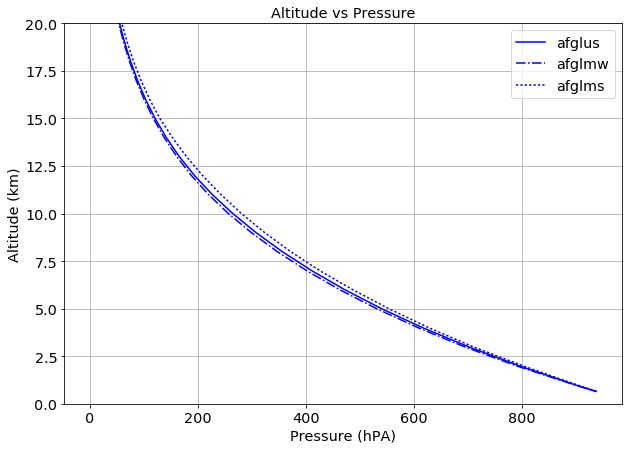

In [33]:
plt.plot(Pressure,z,color='blue',linestyle='-',label='afglus')
plt.plot(Pressure2,z2,color='blue',linestyle='-.',label='afglmw')
plt.plot(Pressure3,z3,color='blue',linestyle=':',label='afglms')
plt.title('Altitude vs Pressure')
plt.xlabel('Pressure (hPA)')
plt.ylabel('Altitude (km)')
plt.ylim(0.,20.)
plt.grid(True)
plt.legend(loc='best')

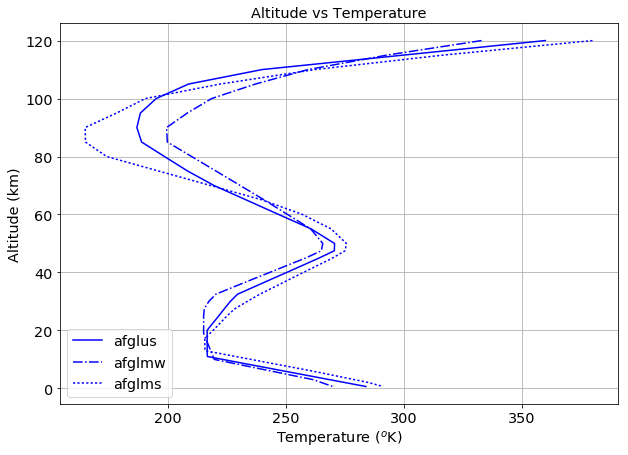

In [34]:
plt.plot(Temperature,z,color='blue',linestyle='-',label='afglus')
plt.plot(Temperature2,z2,color='blue',linestyle='-.',label='afglmw')
plt.plot(Temperature3,z3,color='blue',linestyle=':',label='afglms')
plt.title('Altitude vs Temperature')
plt.xlabel('Temperature ($^o$K)')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.legend(loc='best')

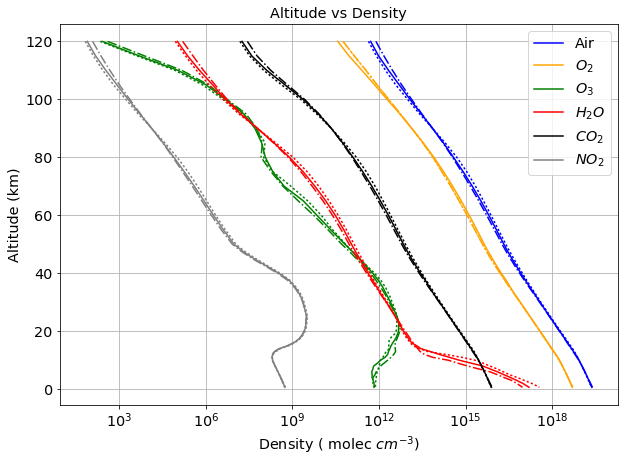

In [44]:
plt.semilogx(AirDensity,z ,label='Air',color='blue')
plt.semilogx(AirDensity2,z2 ,color='blue',linestyle='-.')
plt.semilogx(AirDensity3,z3 ,color='blue',linestyle=':')
plt.semilogx(O2Density,z ,label='$O_2$',color='orange',linestyle='-')
plt.semilogx(O2Density2,z2 ,color='orange',linestyle='-.')
plt.semilogx(O2Density2,z2 ,color='orange',linestyle=':')
plt.semilogx(O3Density,z ,label='$O_3$',color='green',linestyle='-')
plt.semilogx(O3Density2,z2 ,color='green',linestyle='-.')
plt.semilogx(O3Density3,z3 ,color='green',linestyle=':')
plt.semilogx(PWVDensity,z ,label='$H_2O$',color='red',linestyle='-')
plt.semilogx(PWVDensity2,z2 ,color='red',linestyle='-.')
plt.semilogx(PWVDensity3,z3 ,color='red',linestyle=':')
plt.semilogx(CO2Density,z ,label='$CO_2$',color='black',linestyle='-')
plt.semilogx(CO2Density2,z2 ,color='black',linestyle='-.')
plt.semilogx(CO2Density3,z3 ,color='black',linestyle=':')
plt.semilogx(NO2Density,z ,label='$NO_2$',color='grey',linestyle='-')
plt.semilogx(NO2Density2,z2 ,color='grey',linestyle='-.')
plt.semilogx(NO2Density3,z3 ,color='grey',linestyle=':')
plt.title('Altitude vs Density')
plt.xlabel('Density ( molec $cm^{-3}$)')
plt.ylabel('Altitude (km)')
plt.legend(loc='best')
plt.grid(True)

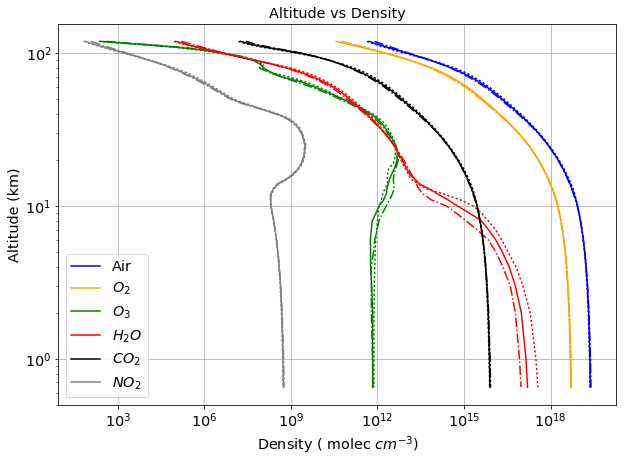

In [45]:
plt.loglog(AirDensity,z ,label='Air',color='blue')
plt.loglog(AirDensity2,z2 ,color='blue',linestyle='-.')
plt.loglog(AirDensity3,z3 ,color='blue',linestyle=':')
plt.loglog(O2Density,z ,label='$O_2$',color='orange',linestyle='-')
plt.loglog(O2Density2,z2 ,color='orange',linestyle='-.')
plt.loglog(O2Density2,z2 ,color='orange',linestyle=':')
plt.loglog(O3Density,z ,label='$O_3$',color='green',linestyle='-')
plt.loglog(O3Density2,z2 ,color='green',linestyle='-.')
plt.loglog(O3Density3,z3 ,color='green',linestyle=':')
plt.loglog(PWVDensity,z ,label='$H_2O$',color='red',linestyle='-')
plt.loglog(PWVDensity2,z2 ,color='red',linestyle='-.')
plt.loglog(PWVDensity3,z3 ,color='red',linestyle=':')
plt.loglog(CO2Density,z ,label='$CO_2$',color='black',linestyle='-')
plt.loglog(CO2Density2,z2 ,color='black',linestyle='-.')
plt.loglog(CO2Density3,z3 ,color='black',linestyle=':')
plt.loglog(NO2Density,z ,label='$NO_2$',color='grey',linestyle='-')
plt.loglog(NO2Density2,z2 ,color='grey',linestyle='-.')
plt.loglog(NO2Density3,z3 ,color='grey',linestyle=':')
plt.title('Altitude vs Density')
plt.xlabel('Density ( molec $cm^{-3}$)')
plt.ylabel('Altitude (km)')
plt.legend(loc='best')
plt.grid(True)